In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Animals"

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
audio_path = "/content/drive/MyDrive/Animals/bird/9f6fbdb4_nohash_0.wav"
y, sr = librosa.load(audio_path, sr=22050)
ipd.Audio(y, rate=sr)


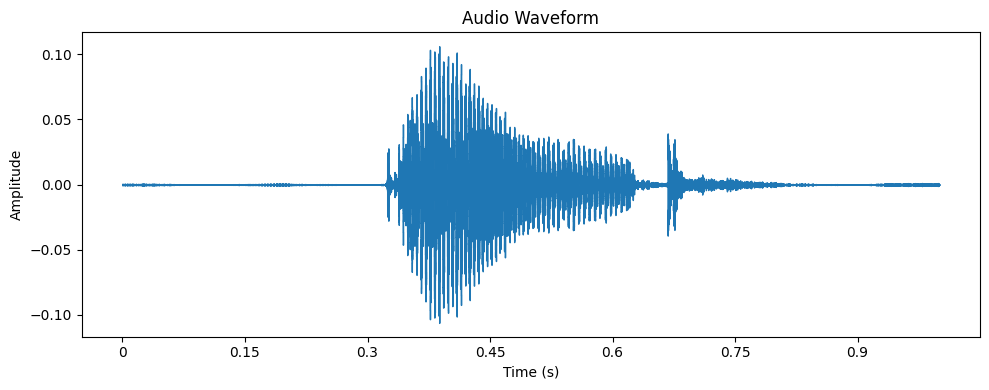

In [ ]:
# 📊 Step 4: Visualize waveform
plt.figure(figsize=(10, 4))
plt.title("Audio Waveform")
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
from collections import Counter

# Function to add Gaussian noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

# Path to dataset
dataset_path = "/content/drive/MyDrive/Animals"

X = []
y = []
class_counts = Counter()

# Loop through each actor folder
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)

    if not os.path.isdir(actor_path):
        continue  # Skip non-directory files

    # Loop through each audio file
    for file in os.listdir(actor_path):
        file_path = os.path.join(actor_path, file)

        if not file.endswith(".wav"):
            continue  # Skip non-audio files

        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Combine all features
        features = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)))

        # Extract emotion label (assuming it's the folder name)
        emotion = actor_folder  # Changed to use folder name as label

        # Append to dataset
        X.append(features)
        y.append(emotion)
        class_counts[emotion] += 1

        # If class has fewer samples, augment with noise
        if class_counts[emotion] < 500:  # Adjust this threshold
            audio_noisy = add_noise(audio)
            mfccs_noisy = librosa.feature.mfcc(y=audio_noisy, sr=sr, n_mfcc=40)
            chroma_noisy = librosa.feature.chroma_stft(y=audio_noisy, sr=sr)
            spectral_contrast_noisy = librosa.feature.spectral_contrast(y=audio_noisy, sr=sr)

            features_noisy = np.concatenate((mfccs_noisy.mean(axis=1), chroma_noisy.mean(axis=1), spectral_contrast_noisy.mean(axis=1)))

            X.append(features_noisy)
            y.append(emotion)
            class_counts[emotion] += 1  # Update count after augmentation

print("Balanced Class Distribution:", class_counts)

Balanced Class Distribution: Counter({'dog': 300, 'bird': 300})


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Get the number of classes from the shape of y_train
num_classes = y_train.shape[1] # or use num_classes from previous code block

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(128, return_sequences=True),  # First additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),  # Second additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64),  # Final LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')  # Output layer with the correct number of classes
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 1, 128)         │        96,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,954 (1.20 MB)

 Trainable params: 313,186 (1.19 MB)

 Non-trainable params: 768 (3.00 KB)

ADDITIONAL 2 LAYERS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(128, return_sequences=True),  # First additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),  # Second additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64),  # Final LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(8, activation='softmax')  # Output layer (8 classes for emotions)
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 1, 128)         │        96,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,152 (1.20 MB)

 Trainable params: 313,384 (1.20 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.4914 - loss: 0.9941 - val_accuracy: 0.5167 - val_loss: 0.6928
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6234 - loss: 0.7558 - val_accuracy: 0.5167 - val_loss: 0.6930
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6172 - loss: 0.7421 - val_accuracy: 0.5167 - val_loss: 0.6924
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6873 - loss: 0.5746 - val_accuracy: 0.5167 - val_loss: 0.6887
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7399 - loss: 0.5481 - val_accuracy: 0.5833 - val_loss: 0.6829
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7376 - loss: 0.5032 - val_accuracy: 0.8667 - val_loss: 0.6718
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8013 - loss: 0.3825 - val_accuracy: 0.8333 - val_loss: 0.6294
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7991 - loss: 0.4068 - val_accuracy: 0.8917 - 

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9675 - loss: 0.1997
Test Accuracy: 95.00%


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
# Predict the classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class with highest probability

# Get true classes
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')  # Weighted average for imbalanced classes
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step
Accuracy: 95.00%
F1-Score: 0.95
Precision: 0.95
Recall: 0.95


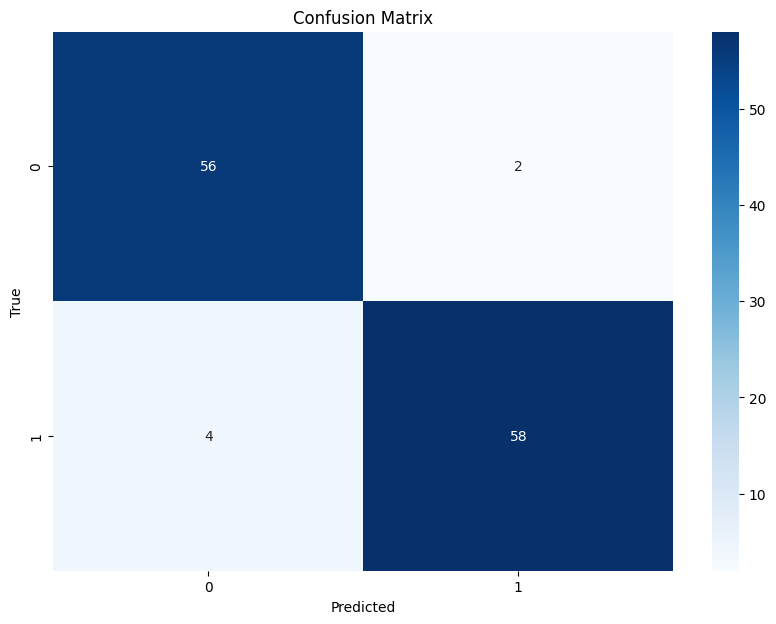

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' or similar holds the original labels before encoding
# Get the original labels (before one-hot encoding)
y_original = np.argmax(y, axis=1)  # Convert one-hot to original labels

# Create and fit LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_original)  # Fit on original labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

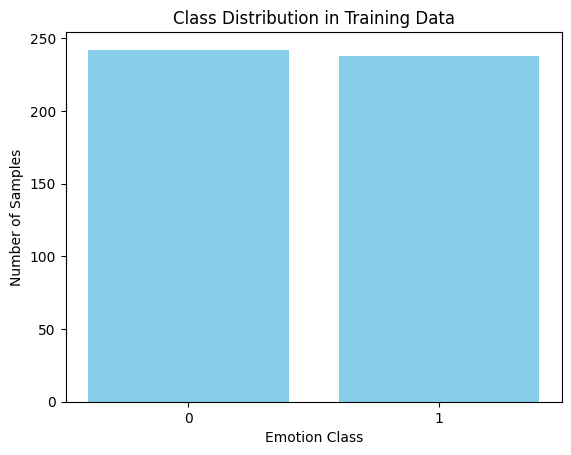

Class Distribution: Counter({np.int64(0): 242, np.int64(1): 238})


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Assuming y_train contains emotion labels (one-hot or encoded as numbers)
labels = np.argmax(y_train, axis=1)  # Convert one-hot to integer labels

# Count occurrences of each class
class_counts = Counter(labels)

# Plot the distribution
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Emotion Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.xticks(range(len(class_counts)))
plt.show()

# Print class-wise counts
print("Class Distribution:", class_counts)


In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set path
DATASET_PATH = "/content/drive/MyDrive/Animals"

# Lists
mfcc_sequences = []
labels = []

# Extract MFCCs for each audio file
for label in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, label)

    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".wav") or filename.endswith(".mp3"):
                file_path = os.path.join(folder_path, filename)
                try:
                    y, sr = librosa.load(file_path, sr=22050)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

                    # Transpose to shape (time, features)
                    mfcc = mfcc.T
                    mfcc_sequences.append(mfcc)
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Pad sequences (so LSTM can process them in batches)
max_len = max([x.shape[0] for x in mfcc_sequences])
padded_mfcc = pad_sequences(mfcc_sequences, maxlen=max_len, padding='post', dtype='float32')

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_mfcc, y_categorical, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    Masking(mask_value=0.0, input_shape=(max_len, 13)),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.4961 - loss: 0.7147 - val_accuracy: 0.5333 - val_loss: 0.7034
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6587 - loss: 0.6316 - val_accuracy: 0.5833 - val_loss: 0.6581
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8247 - loss: 0.5509 - val_accuracy: 0.7833 - val_loss: 0.5882
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8148 - loss: 0.4991 - val_accuracy: 0.8167 - val_loss: 0.5176
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8984 - loss: 0.4355 - val_accuracy: 0.9167 - val_loss: 0.4235
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9389 - loss: 0.3713 - val_accuracy: 0.8667 - val_loss: 0.4041
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9352 - loss: 0.3048 - val_accuracy: 0.9167 - val_loss: 0.3399
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9502 - loss: 0.2506 - val_accuracy: 0.9000 - val_loss: 0.282

In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

baseline_accuracy = 0.25

n_samples = len(y_true)

count = int(accuracy * n_samples)
nobs = n_samples
stat, p_value = proportions_ztest(count, nobs, value=baseline_accuracy, alternative='larger')  # One-tailed test for improvement

# 5. Print Results:
print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject null hypothesis: Model accuracy is significantly better than baseline.")
else:
    print("Fail to reject null hypothesis: Model accuracy is not significantly better than baseline.")

Z-statistic: 35.18
P-value: 0.000
Reject null hypothesis: Model accuracy is significantly better than baseline.


In [ ]:
import numpy as np
from scipy import stats
baseline_accuracy = 0.25

n_samples = len(y_true)

standard_error = np.sqrt((accuracy * (1 - accuracy)) / n_samples)

# 5. Perform T-test:
t_statistic, p_value = stats.ttest_1samp(
    [accuracy], baseline_accuracy
)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Model accuracy is significantly different from baseline.")
else:
    print("Fail to reject null hypothesis: Model accuracy is not significantly different from baseline.")

T-statistic: nan
P-value: nan
Fail to reject null hypothesis: Model accuracy is not significantly different from baseline.
